In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv("../data/german_credit_data.csv")

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
train, test = train_test_split(df, test_size=0.3, random_state=42)

<AxesSubplot:>

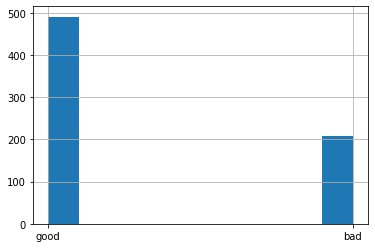

In [25]:
train["Risk"].hist()

In [26]:
train

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
541,541,60,male,2,free,little,NaN,2032,24,car,good
440,440,39,male,3,own,little,NaN,1884,12,car,good
482,482,57,female,2,rent,rich,little,3622,30,furniture/equipment,good
422,422,47,male,1,own,little,moderate,958,12,car,good
778,778,38,male,3,own,rich,NaN,5711,36,car,good
...,...,...,...,...,...,...,...,...,...,...,...
106,106,39,male,3,own,little,NaN,6458,18,car,bad
270,270,32,male,2,own,NaN,NaN,2662,18,car,good
860,860,27,male,2,own,rich,NaN,5804,24,car,good
435,435,25,male,2,own,NaN,moderate,1484,12,radio/TV,bad


<AxesSubplot:xlabel='Risk', ylabel='Age'>

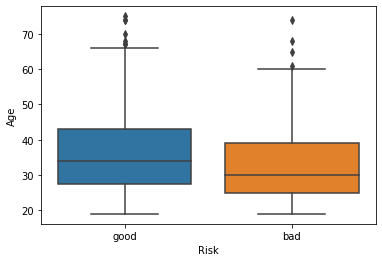

In [27]:
sns.boxplot(data=train, x='Risk', y='Age')

In [39]:
tabla_sexo = pd.crosstab(index=train['Risk'], columns=train['Sex'],margins=True)

In [40]:
tabla_sexo

Sex,female,male,All
Risk,,,
bad,80,129,209
good,142,349,491
All,222,478,700


In [45]:
tabla_sexo.loc["bad", :]/tabla_sexo.loc["All", :]

Sex
female    0.360360
male      0.269874
All       0.298571
dtype: float64

In [46]:
tab = tabla_sexo.loc["bad", :]/tabla_sexo.loc["All", :] 

<AxesSubplot:xlabel='Sex'>

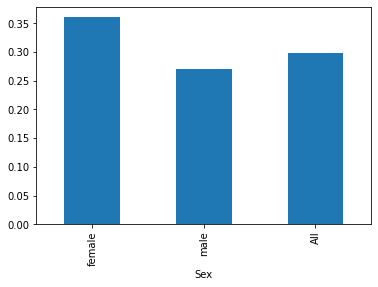

In [47]:
tab.plot(kind='bar')

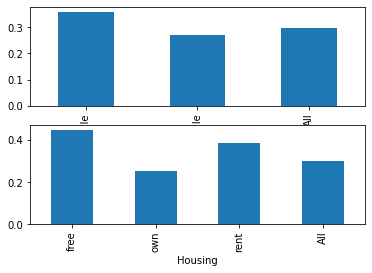

<Figure size 1440x1440 with 0 Axes>

In [66]:
columns = ["Sex", "Housing"]
fig, ax = plt.subplots(len(columns), )
plt.figure(figsize=(20, 20))
for i, c in enumerate(columns):
    tabla = pd.crosstab(index=train['Risk'], columns=train[c],margins=True)
    tab = tabla.loc["bad", :]/tabla.loc["All", :] 
    tab.plot(ax=ax[i], kind='bar')


In [67]:
features = ['Sex', 'Age', 'Credit amount', 'Housing']
y_train = train['Risk']
X_train = train[features]

In [80]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [74]:
# para transformar datos categóricos en numéricos
encoder = OneHotEncoder()

In [75]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [95]:
# Estregia para llenar datos que faltan
numericImputer = SimpleImputer(strategy='mean')
categoricImputer = SimpleImputer(strategy='most_frequent')


In [ ]:
# Usa MinMaxScaler para que todas las variables estén en la misma escala. En este caso [0, 1]
scaler = MinMaxScaler()

In [77]:
from sklearn.pipeline import Pipeline

In [96]:
# Serie de pasos a aplicar a los datos numéricos
numericPipeline = Pipeline([
    ("imputar_numeros", numericImputer),
    ("escalado", scaler)
])

In [86]:
# Serie de pasos a aplicar a los datos categóricos
categoricalPipeline = Pipeline([
    ("imputar_categorias", categoricImputer),
    ("oneHot", encoder)
])

In [87]:
from sklearn.compose import ColumnTransformer

In [114]:
# indica que pipeline hay que aplicarle a cada columna
transformer =\
ColumnTransformer([("pipeline numerico", numericPipeline, [1, 2]),
                   ("pipeline categorico", categoricalPipeline, [0, 3])
                ])

In [115]:
X_train_transform = transformer.fit_transform(X_train)

In [116]:
X_train_transform

array([[0.73214286, 0.09805216, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.35714286, 0.08990866, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.67857143, 0.18553978, 1.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.14285714, 0.30560141, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.10714286, 0.0678992 , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.08928571, 0.03752614, 1.        , ..., 0.        , 1.        ,
        0.        ]])

In [117]:
transformer.transform([['male', 46, 2000, 'own']])

/home/camilo/maestria/modelo-credito/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/home/camilo/maestria/modelo-credito/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array([[0.48214286, 0.09629141, 0.        , 1.        , 0.        ,
        1.        , 0.        ]])

In [118]:
import numpy as np

In [120]:
transformer.transform([[np.nan, np.nan, 1000, 'free']])

/home/camilo/maestria/modelo-credito/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/home/camilo/maestria/modelo-credito/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array([[0.29451531, 0.04126775, 0.        , 1.        , 1.        ,
        0.        , 0.        ]])